<a href="https://colab.research.google.com/github/yagop27/Space-Missions-Analysis/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [104]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# These might be helpful:
import iso3166
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('all_mission_launches_9Feb2024.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(6711, 8)

In [7]:
df_data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Datetime', 'Details',
       'Status', 'Price', 'Mission_status'],
      dtype='object')

In [8]:
df_data.isna().any()

,0
Unnamed: 0,False
Organisation,False
Location,False
Datetime,False
Details,False
Status,False
Price,True
Mission_status,False


In [9]:
df_data.duplicated().any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [10]:
df_data = df_data.drop(['Unnamed: 0'], axis=1)

In [11]:
df_clean_price_data = df_data.dropna()
df_clean_price_data.isna().any()

,0
Organisation,False
Location,False
Datetime,False
Details,False
Status,False
Price,False
Mission_status,False


## Descriptive Statistics

In [12]:
df_data.describe()

,Price
count,"2,637.00"
mean,69.16
std,101.44
min,2.50
25%,20.00
50%,30.00
75%,67.00
max,876.00


In [13]:
df_data.dtypes

,0
Organisation,object
Location,object
Datetime,object
Details,object
Status,object
Price,float64
Mission_status,object


In [ ]:
#df_clean_price_data['Price'] = df_data['Price'].str.replace(',', '').astype(float)

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [14]:
count_of_orgs = df_data.groupby('Organisation').size().reset_index(name='Count')
count_of_orgs = count_of_orgs.sort_values(by='Count', ascending=False)

In [15]:
org_launches = px.histogram(x=count_of_orgs.Organisation,
                            y=count_of_orgs.Count,
                            title='Number of Launches per Organisation',
                            color=count_of_orgs.Organisation,
                            nbins=60)

# Update chart layout
org_launches.update_layout(
    yaxis_title="Number of Launches",  # Remove "sum of"
    showlegend=False,  # Remove color legend
    plot_bgcolor="rgba(245, 245, 245, 1)",  # Light background
    xaxis_title="Organisations",  # Explicit x-axis title
    xaxis=dict(
        tickangle=45,  # Rotate x-ticks
        tickfont=dict(size=10)  # Adjust font size
    ),
     width=1200,  # Increase chart width
    height=600,  # Increase chart height
    title=dict(
        x=0.5,  # Center title
        font=dict(size=16)  # Title font size
    )
)

org_launches.show()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [16]:
stats_of_rockets = df_data.value_counts('Status')

In [17]:
print("Number of active rockets is:", stats_of_rockets.iloc[0])
print("Number of retired rockets is:", stats_of_rockets.iloc[1])

Number of active rockets is: 5240
Number of retired rockets is: 1471


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [18]:
mission_status = df_data.value_counts('Mission_status')

In [19]:
print("Successes:", mission_status.iloc[0])
print("Failures:", mission_status.iloc[1])
print("Partial Failures:", mission_status.iloc[2])
print("Prelaunch Failures:", mission_status.iloc[3])

Successes: 6134
Failures: 455
Partial Failures: 114
Prelaunch Failures: 8


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [20]:
price_ordered = df_clean_price_data.sort_values('Price', ascending=False)

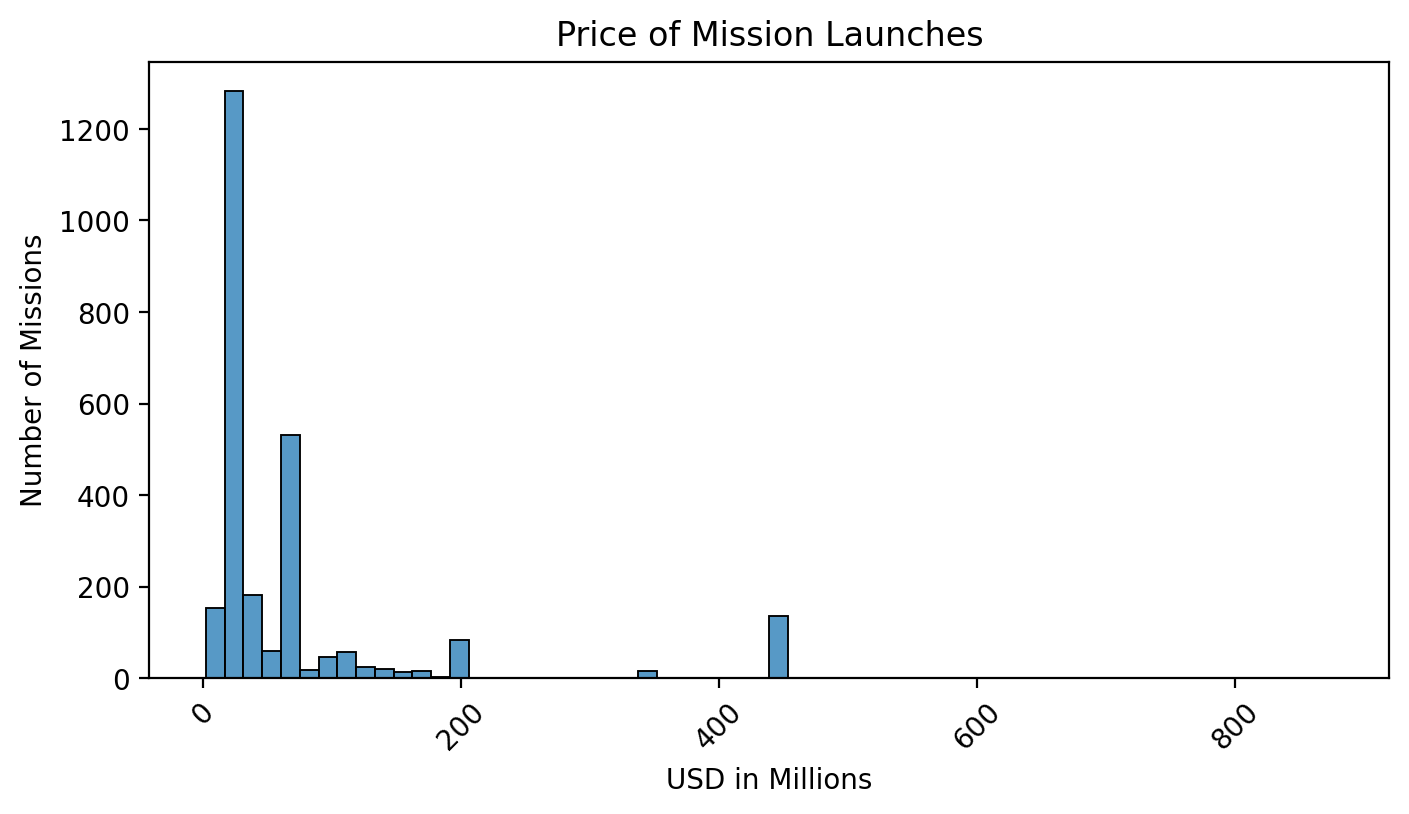

In [21]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_clean_price_data,
             x='Price',
             bins=60

             )
plt.xlabel('USD in Millions')
plt.xticks(rotation=45)




plt.ylabel('Number of Missions')
plt.title('Price of Mission Launches')
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
# Retrieving the names of the countries from the Locations column
countries = []
for location in df_data.Location:
  count = 0
  for letter in location[::-1]:
    if letter == ",":
      countries.append(location[-count + 1:])
      break
    else:
      count += 1

In [23]:
names_to_change = {'Russia': 'Russian Federation', 'New Mexico': 'USA', 'Yellow Sea': 'China',
                   'Shahrud Missile Test Site': 'Iran', 'Pacific Missile Range Facility': 'USA',
                   'Barents Sea': 'Russian Federation', 'Gran Canaria': 'USA',
                   'China Coastal Waters': 'China', 'Iran': 'Iran, Islamic Republic of',
                   'South Korea': 'Korea, Republic of',
                   'North Korea': "Korea, Democratic People's Republic of",
                   'United Kingdom': "United Kingdom of Great Britain and Northern Ireland",
                   'Pacific Ocean': 'Russian Federation'}

# Udating the names of the countries to plot a chart by countrie
for name in range(len(countries)):
  if countries[name] in names_to_change:
    countries[name] = names_to_change[countries[name]]

df_data['countries'] = countries


In [24]:
iso_code = []
for name in countries:
  iso_code.append(iso3166.countries[name].alpha3)

df_data['ISO'] = iso_code # Adding a ISO Code column for each countrie in the data base

In [25]:
n_of_missions = df_data['ISO'].value_counts().reset_index()
n_of_missions.columns = ['ISO', 'count']

In [26]:
fig = px.choropleth(n_of_missions,
                    locations="ISO",
                    color="count",
                    hover_name="ISO",
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [27]:
n_of_failures = df_data[df_data['Mission_status'] == 'Failure']['ISO'].value_counts().reset_index()
n_of_failures.columns = ['ISO', 'count']


In [28]:
px.choropleth(n_of_failures,
              locations='ISO',
              color='count',
              hover_name='ISO',
              color_continuous_scale=px.colors.sequential.matter)

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [29]:

px.sunburst(df_data,
            path=['ISO', 'Organisation', 'Mission_status'],)



# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [30]:
total_amount_per_org = df_clean_price_data.groupby(['Organisation']).agg({'Price': pd.Series.sum}) # The price of each launch is in USD Millions
total_amount_per_org = total_amount_per_org.sort_values(by='Price', ascending=False)

In [31]:
total_price_org = px.histogram(x=total_amount_per_org.index,
                            y=total_amount_per_org.Price,
                            title='Total Amount of Money Spend by Organisation',
                            color=total_amount_per_org.index,
                            nbins=60)

# Update chart layout
total_price_org.update_layout(
    yaxis_title="Total Amount in USD Millions",
    showlegend=False,  # Remove color legend
    plot_bgcolor="rgba(245, 245, 245, 1)",  # Light background
    xaxis_title="Organisations",  # Explicit x-axis title
    xaxis=dict(
        tickangle=45,  # Rotate x-ticks
        tickfont=dict(size=10)  # Adjust font size
    ),
     width=1200,  # Increase chart width
    height=600,  # Increase chart height
    title=dict(
        x=0.5,  # Center title
        font=dict(size=16)  # Title font size
    )
)

total_price_org.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [32]:
price_launch_org = df_clean_price_data.groupby(['Organisation']).agg({'Price': pd.Series.mean})
price_launch_org = price_launch_org.sort_values(by='Price', ascending=False)
# The average price of each launch (in USD Millions) per launch
price_launch_org

,Price
Organisation,
NASA,453.11
Boeing,177.29
ULA,155.50
Arianespace,141.19
MHI,93.78
Martin Marietta,80.16
ILS,71.01
SpaceX,65.68
US Air Force,59.65


# Chart the Number of Launches per Year

In [33]:
for index, row in df_data.iterrows():
    try:
        # Attempt to parse the date using the first format
        dt = datetime.strptime(row['Datetime'], '%a %b %d, %Y %H:%M %Z')
    except ValueError:
        try:
            # Attempt to parse the date using the second format
            dt = datetime.strptime(row['Datetime'], '%a %b %d, %Y')
        except ValueError:
            # Handle the case where both formats fail
            dt = None  # Or some default value

    # Update the value in the DataFrame
    df_data.at[index, 'Datetime'] = dt



In [34]:
# Ensure 'Date' column is in datetime format
df_data['Datetime'] = pd.to_datetime(df_data['Datetime'], errors='coerce')

# Extract the year from the 'Date' column
df_data['Year'] = df_data['Datetime'].dt.year

# Group by year and count the occurrences
filtered_data = df_data[df_data['Year'] < 2024] # The data is from the beggining of 2024, so its not to included
yearly_counts = filtered_data.groupby('Year').size().reset_index(name='Count')


In [35]:

year_launch = px.line(x=yearly_counts.Year,
                           y=yearly_counts.Count,
                           title='Number of Launches per Year')

# Update chart layout
year_launch.update_layout(
    yaxis_title="Number of Launches",  # Remove "sum of"
    showlegend=False,  # Remove color legend
    plot_bgcolor="rgba(245, 245, 245, 1)",  # Light background
    xaxis_title="Year",  # Explicit x-axis title
    xaxis=dict(
        tickangle=45,  # Rotate x-ticks
        tickfont=dict(size=10)  # Adjust font size
    ),
     width=1200,  # Increase chart width
    height=600,  # Increase chart height
    title=dict(
        x=0.5,  # Center title
        font=dict(size=16)  # Title font size
    ),

)

year_launch.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [36]:
# Extract the year from the 'Date' column
year_month = pd.DataFrame({'YearMonth': df_data['Datetime'].dt.to_period('M')})


In [37]:
year_month_count = year_month.groupby('YearMonth').size().reset_index(name='Count')
year_month_count['YearMonth'] = year_month_count['YearMonth'].dt.to_timestamp()

In [38]:
year_month_count = year_month_count.sort_values('YearMonth')
year_month_count['RollingAvg'] = year_month_count['Count'].rolling(window=3).mean()

In [39]:

fig = px.line(x=year_month_count.YearMonth,
              y=[year_month_count.Count, year_month_count.RollingAvg],
              markers=True,
              labels={"value": "Number of Launches", "variable": "Type"},
              title='Number of Launches per Month with Rolling Average',)

fig.add_annotation(
    x=year_month_count.loc[year_month_count['Count'].idxmax(), 'YearMonth'],
    y=year_month_count['Count'].max(),
    text="Peak Launch Month",
    showarrow=True,
    arrowhead=2
)

fig.update_layout(
    xaxis=dict(
        tickformat="%Y",  # Show years only
        tickangle=45      # Rotate labels for readability
    )
)

fig.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    font=dict(family="Arial", size=12),
    width=1200,
    height=600,

)

newnames = {'wide_variable_0':'Count', 'wide_variable_1': 'RollingAvg'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=year_month_count['YearMonth'],
    y=year_month_count['Count'],
    mode='lines+markers',
    name='Monthly Count'
))
fig.add_trace(go.Scatter(
    x=year_month_count['YearMonth'],
    y=year_month_count['RollingAvg'],
    mode='lines',
    name='3-Month Rolling Average',
    line=dict(dash='dash', color='red')
))
fig.update_layout(
    title='Number of Launches per Month with Rolling Average',
    xaxis_title='Month',
    yaxis_title='Number of Launches',
    legend_title='Legend',
)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [41]:
months = pd.DataFrame({'Month': df_data['Datetime'].dt.month})
month_counts = months.groupby('Month').size().reset_index(name='Count')

In [42]:
month_counts.max()

,0
Month,12
Count,713


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [43]:
# Ensure 'Date' column is in datetime format
df_clean_price_data['Datetime'] = pd.to_datetime(df_clean_price_data['Datetime'], errors='coerce')

# Extract the year from the 'Date' column
df_clean_price_data['Year'] = df_clean_price_data['Datetime'].dt.year


<ipython-input-43-30dcf2785d03>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-30dcf2785d03>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
avg_price_over_time = df_clean_price_data.groupby(['Year']).agg({'Price': pd.Series.mean}) # In USD Millions


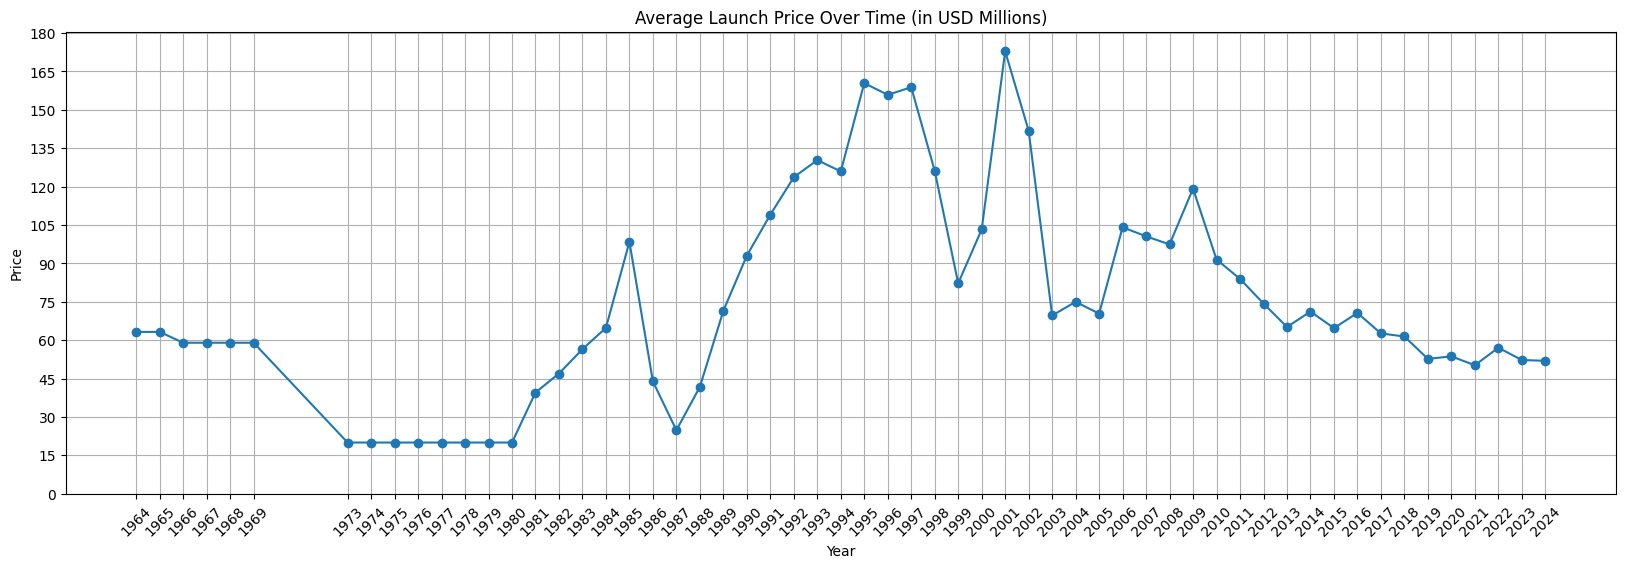

In [45]:
plt.figure(figsize=(20,6))

plt.plot(avg_price_over_time.index,
         avg_price_over_time.Price,
         marker='o',
         linestyle='-')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Average Launch Price Over Time (in USD Millions)')
plt.grid(True)
plt.xticks(avg_price_over_time.index, rotation=45)
plt.yticks(range(0, 190, 15))
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [46]:
launches_per_org_time = df_data.groupby(['Organisation', 'Year']).agg({'Year': 'count'}).rename(columns={'Year': 'Launches'}).reset_index()
top_orgs = launches_per_org_time.groupby('Organisation')['Launches'].sum().nlargest(10).index
filtered_data = launches_per_org_time[launches_per_org_time['Organisation'].isin(top_orgs)]
# Pivot the data to prepare for a multi-line plot
pivot_df = filtered_data.pivot(index='Year', columns='Organisation', values='Launches').fillna(0)

In [47]:
# Create the Plotly figure
fig = px.line(
    filtered_data,
    x='Year',
    y='Launches',
    color='Organisation',
    title='Number of Launches Over Time by Organisation',
    labels={'Launches': 'Number of Launches', 'Year': 'Year'}
)

# Show the plot
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [48]:
usa_cw = df_data[df_data['ISO'] == 'USA'][df_data['Year'] <= 1991]
us_n_launches = usa_cw.groupby('Year').agg({'Year': pd.Series.count})
rus_cw = df_data[(df_data['ISO'].isin(['RUS', 'KAZ'])) & (df_data['Year'] <= 1991)]
rus_n_launches = rus_cw.groupby('Year').agg({'Year': pd.Series.count})

us_n_launches = us_n_launches.rename(columns={'Year': 'USA_Launches'})
rus_n_launches = rus_n_launches.rename(columns={'Year': 'USSR_Launches'})
combined_df = pd.concat([us_n_launches, rus_n_launches], axis=1).fillna(0)

<ipython-input-48-c600aa3549bd>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [49]:
us = us_n_launches['USA_Launches'].sum()
ussr = rus_n_launches['USSR_Launches'].sum()


In [50]:
px.pie(values=[us, ussr], names=['USA', 'USSR'])

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

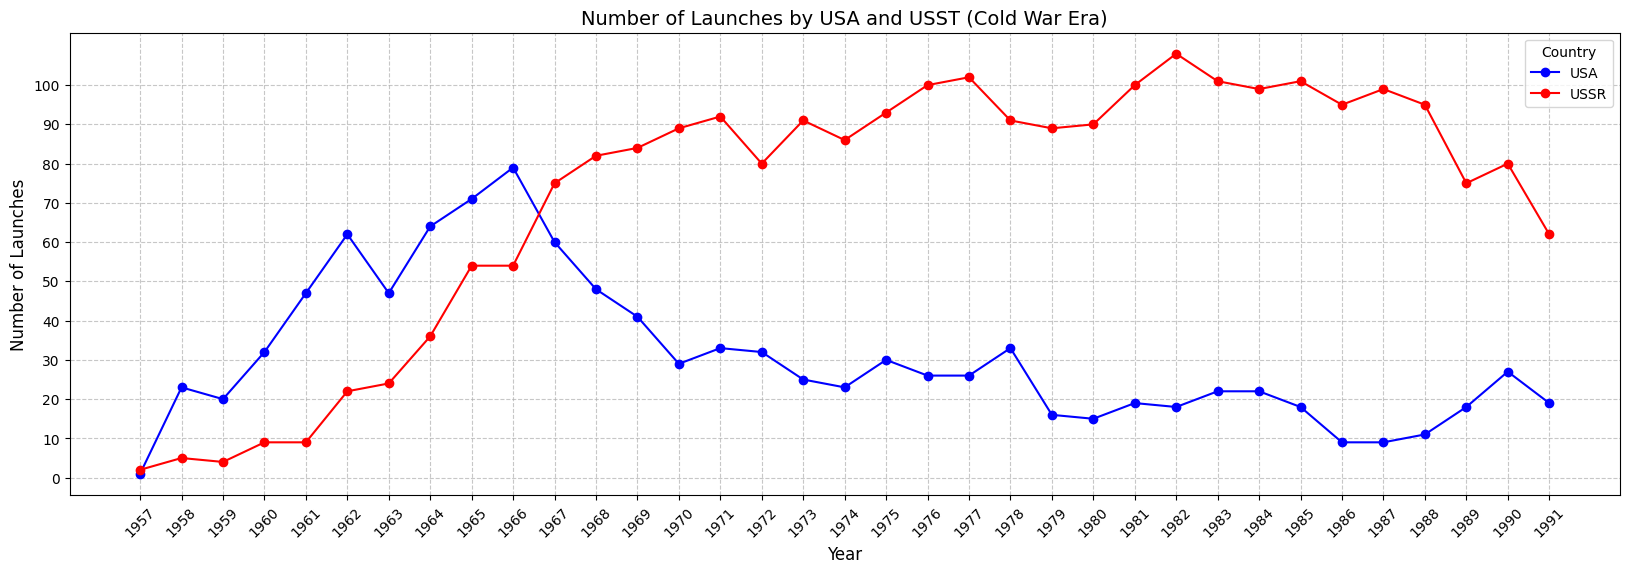

In [51]:
# Plotting the two-line chart
plt.figure(figsize=(20, 6))
plt.plot(combined_df.index, combined_df['USA_Launches'], label='USA', color='blue', marker='o')
plt.plot(combined_df.index, combined_df['USSR_Launches'], label='USSR', color='red', marker='o')

# Add labels, legend, and title
plt.title('Number of Launches by USA and USST (Cold War Era)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Launches', fontsize=12)
plt.legend(fontsize=10, title='Country')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(combined_df.index, rotation=45)
plt.yticks(range(0, 110, 10))
plt.show()



## Chart the Total Number of Mission Failures Year on Year.

In [52]:
n_of_fails = df_data[df_data['Mission_status'] == 'Failure'].groupby('Year').agg({'Year': pd.Series.count})


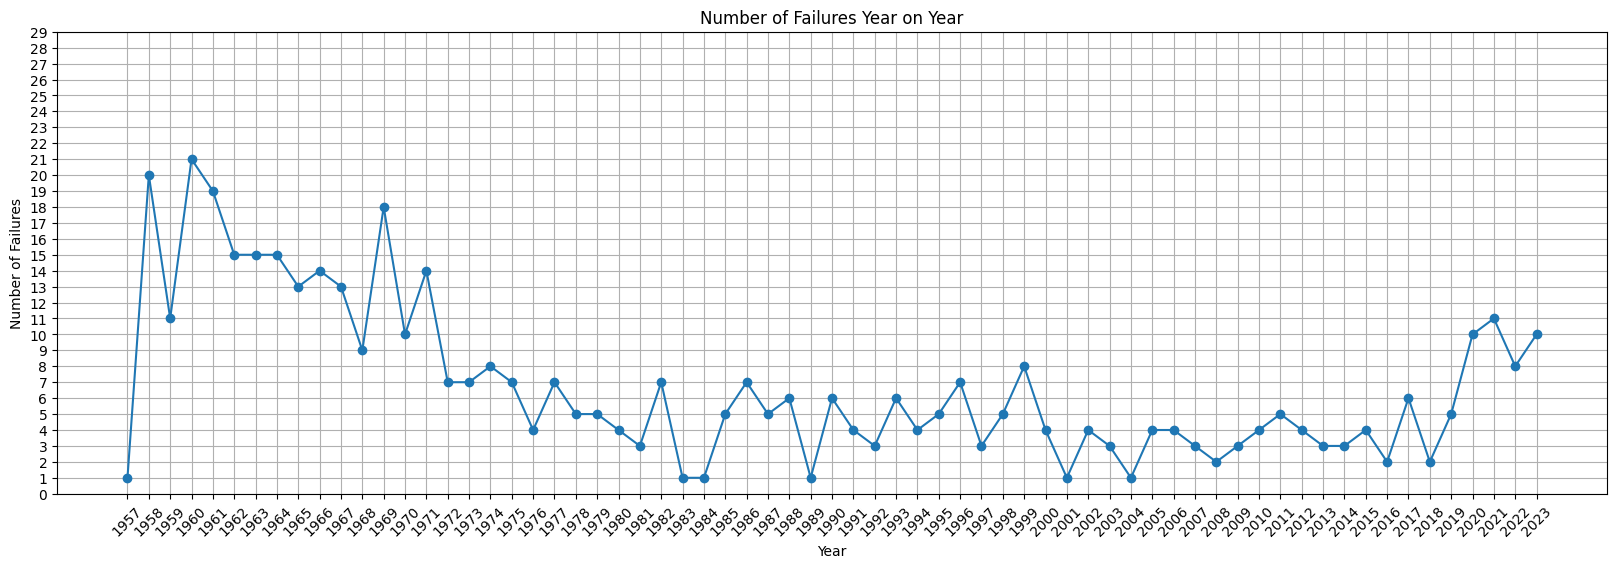

In [53]:
plt.figure(figsize=(20,6))

plt.plot(n_of_fails,
         marker='o',
         linestyle='-')

plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.title('Number of Failures Year on Year')
plt.grid(True)
plt.xticks(n_of_fails.index, rotation=45)
plt.yticks(range(0, 30, 1))
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [54]:
total_n_missions = df_data.groupby('Year').agg({'Year': pd.Series.count})
perc_fail_over_time = (n_of_fails / total_n_missions) * 100
perc_fail_over_time = perc_fail_over_time[:-1]

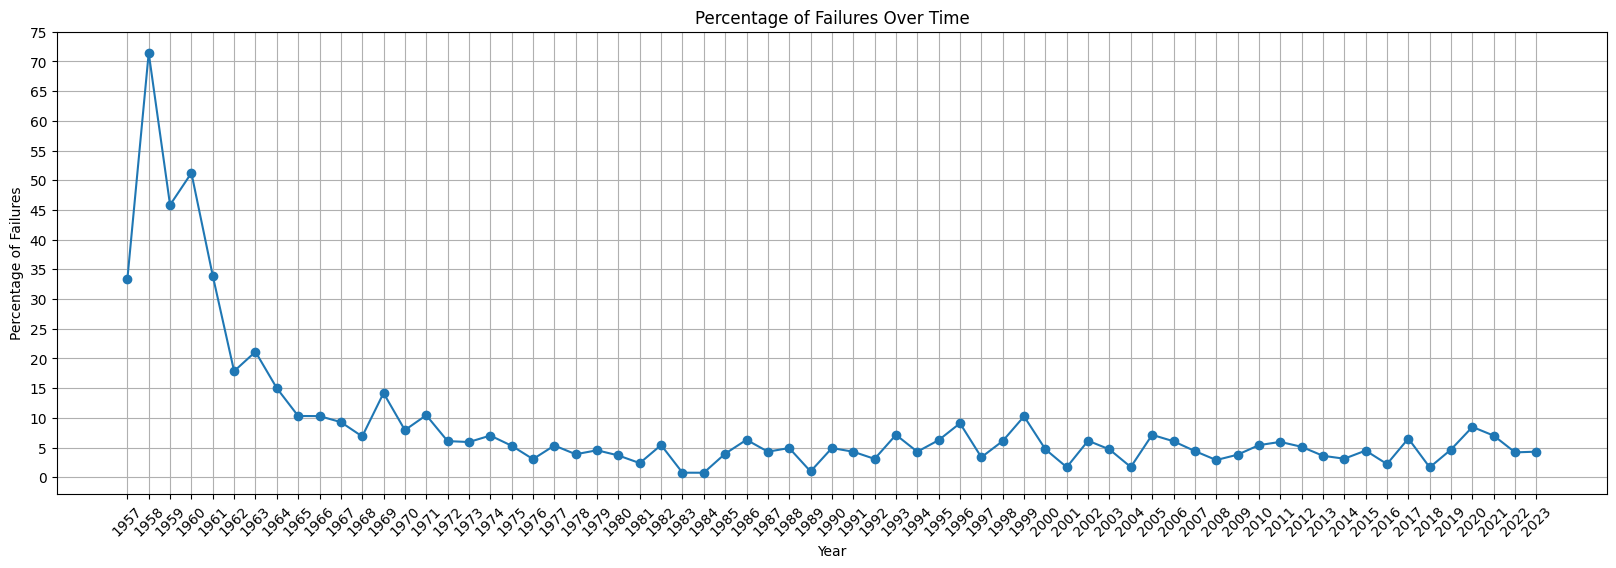

In [55]:
plt.figure(figsize=(20,6))

plt.plot(perc_fail_over_time.index,
         perc_fail_over_time.Year,
         marker='o')

plt.title('Percentage of Failures Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Failures')
plt.xticks(perc_fail_over_time.index, rotation=45)
plt.yticks(range(0, 80, 5))
plt.grid(True)

plt.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches

Do the results change if we only look at the number of successful launches?

In [95]:
n_launches_country = df_data.groupby(['Year', 'countries']).agg({'Year': pd.Series.count}).rename(columns={'Year': 'Launches'}).reset_index()
n_launches_country = n_launches_country.loc[n_launches_country.groupby('Year')['Launches'].idxmax()]
piv_df = n_launches_country.pivot(index='Year', columns='countries', values='Launches').fillna(0)

In [99]:
launches_country = px.bar(piv_df,
                           title='Number of Launches (Total) by Countries per Year',
                           labels={'value': 'Number of Launches'})


launches_country.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    xaxis=dict(showgrid=True, tickangle=45, dtick=2),
    yaxis=dict(showgrid=True),
    font=dict(family="Arial", size=12),
    width=1200,
    height=600,

)


In [102]:
sucess_launches_country = df_data[df_data['Mission_status'] == 'Success'].groupby(['Year', 'countries']).agg({'Year': pd.Series.count}).rename(columns={'Year': 'Launches'}).reset_index()
sucess_launches_country = sucess_launches_country.loc[sucess_launches_country.groupby('Year')['Launches'].idxmax()]
sucess_pivot = sucess_launches_country.pivot(index='Year', columns='countries', values='Launches').fillna(0)

In [103]:
sucess_launches = px.bar(sucess_pivot,
                           title='Number of Launches (Successful) by Countries per Year',
                           labels={'value': 'Number of Launches'})


sucess_launches.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    xaxis=dict(showgrid=True, tickangle=45, dtick=2),
    yaxis=dict(showgrid=True),
    font=dict(family="Arial", size=12),
    width=1200,
    height=600,

)

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [84]:
orgs_launches_year = df_data.groupby(['Organisation', 'Year']).size().reset_index(name='Count')
orgs_launches_year = orgs_launches_year.loc[orgs_launches_year.groupby('Year')['Count'].idxmax()]
pivot_orgs = orgs_launches_year.pivot(index='Organisation', columns='Year', values='Count').fillna(0)
# Reshape the data to long format
long_data = pivot_orgs.reset_index().melt(id_vars='Organisation', var_name='Year', value_name='Count')

In [94]:
top_orgs_year = px.bar(long_data,
                       x='Year',
                       y='Count',
                       color='Organisation',
                       labels={'Count': 'Launches'},
                       title='Organisation with the highest number of Launches over the Years')



top_orgs_year.update_layout(
    title=dict(font=dict(size=20), x=0.5),
    xaxis=dict(showgrid=True, tickangle=45, dtick=2),
    yaxis=dict(showgrid=True),
    font=dict(family="Arial", size=12),
    width=1200,
    height=600,

)
